In [6]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

X = X.loc[:, ['bmi']]

X = X * 30 + 25

X_train = X.iloc[-20:]
y_train = y.iloc[-20:]

df = pd.concat([X_train, y_train], axis=1)
df.sample(3)

,bmi,target
432,26.656880,173.0
435,24.296472,64.0
429,24.005462,94.0


<Axes: xlabel='bmi', ylabel='target'>

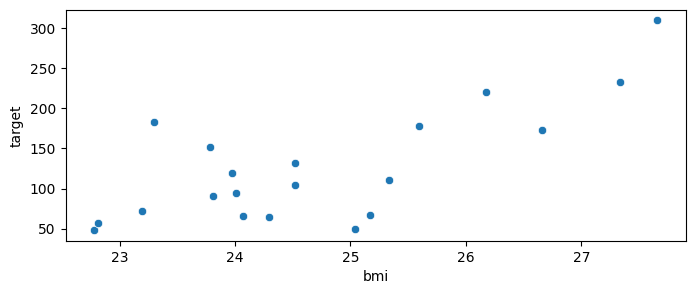

In [38]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=df, x='bmi', y='target')

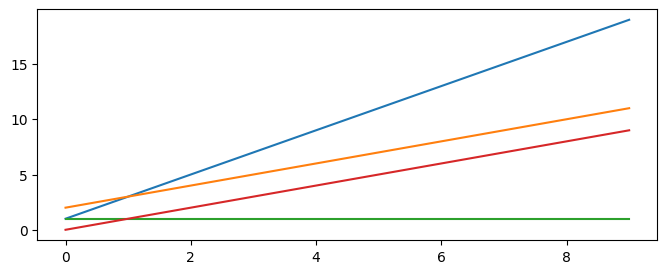

In [39]:
# y = theta_0 + X_1 * theta_1
plt.figure(figsize=(8, 3))
thetas = [(1, 2), (2, 1), (1, 0), (0, 1)]
for theta_0, theta_1 in thetas:
    x = np.arange(0, 10)
    y = theta_0 + x*theta_1
    sns.lineplot(y)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'theta_0 = {lr.intercept_}')
print(f'theta_1 = {lr.coef_[0]}')

theta_0 = -797.0817390343259
theta_1 = 37.378842160521195


In [41]:
y_pred = lr.predict(X_train)

In [56]:
X_test =  X[:3]
y_test =  y[:3]

In [67]:
y_pred_test = lr.predict(X_test)

<Axes: xlabel='bmi', ylabel='target'>

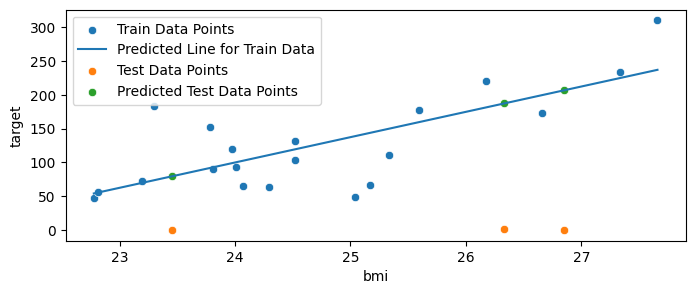

In [70]:
plt.figure(figsize=(8, 3))

sns.scatterplot(x=X_train['bmi'], y=y_train, label='Train Data Points')
sns.lineplot(x=X_train['bmi'], y=y_pred, label='Predicted Line for Train Data')
sns.scatterplot(x=X_test.iloc[:, 0], y=y_test, label='Test Data Points')
sns.scatterplot(x=X_test.iloc[:, 0], y=y_pred_test, label='Predicted Test Data Points')
